In [1]:
# =============================================
# DEEPFAKE DETECTION TESTING SCRIPT
# =============================================

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Configuration
class TestConfig:
    model_path = "deepfake_detector.keras"  # Your trained model
    img_size = (300, 300)                  # Must match training size
    test_dir = "/Users/fenilvadher/Documents/Collage Data/SEM - 6/AI/AI Project/Final Dataset/Real/00000.jpg"                # Directory containing test images
    threshold = 0.5                         # Classification threshold

class DeepfakeTester:
    def __init__(self):
        # Load the trained model
        self.model = tf.keras.models.load_model(TestConfig.model_path)
        print("Model loaded successfully")
        
    def preprocess_image(self, img_path):
        """Preprocess image for model prediction"""
        img = image.load_img(img_path, target_size=TestConfig.img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
        return img_array
    
    def predict_single_image(self, img_path):
        """Make prediction for a single image"""
        try:
            # Preprocess and predict
            img_array = self.preprocess_image(img_path)
            prediction = self.model.predict(img_array)[0][0]
            
            # Interpret results
            label = "FAKE" if prediction > TestConfig.threshold else "REAL"
            confidence = prediction if label == "FAKE" else 1 - prediction
            
            # Display results
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.figure(figsize=(8, 6))
            plt.imshow(img)
            plt.title(f"Prediction: {label} ({confidence:.2%} confidence)")
            plt.axis('off')
            plt.show()
            
            return {
                "image": os.path.basename(img_path),
                "prediction": label,
                "confidence": float(confidence),
                "probability": float(prediction)
            }
            
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            return None
    
    def test_directory(self):
        """Test all images in a directory"""
        results = []
        valid_extensions = ('.jpg', '.jpeg', '.png')
        
        if not os.path.exists(TestConfig.test_dir):
            print(f"Test directory not found: {TestConfig.test_dir}")
            return []
        
        # Process each image in test directory
        for img_file in os.listdir(TestConfig.test_dir):
            if img_file.lower().endswith(valid_extensions):
                img_path = os.path.join(TestConfig.test_dir, img_file)
                result = self.predict_single_image(img_path)
                if result:
                    results.append(result)
                    print(f"{img_file}: {result['prediction']} ({result['confidence']:.2%})")
        
        # Generate summary statistics
        if results:
            self.generate_summary(results)
        
        return results
    
    def generate_summary(self, results):
        """Generate summary statistics"""
        real_count = sum(1 for r in results if r['prediction'] == "REAL")
        fake_count = len(results) - real_count
        
        print("\n=== TEST SUMMARY ===")
        print(f"Total images tested: {len(results)}")
        print(f"REAL images detected: {real_count}")
        print(f"FAKE images detected: {fake_count}")
        
        # Plot distribution
        plt.figure(figsize=(6, 4))
        plt.bar(['REAL', 'FAKE'], [real_count, fake_count], color=['green', 'red'])
        plt.title("Prediction Distribution")
        plt.ylabel("Number of Images")
        plt.show()

=== DEEPFAKE DETECTION TESTING ===
Model loaded successfully

Options:
1. Test single image
2. Test all images in directory
3. Exit
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


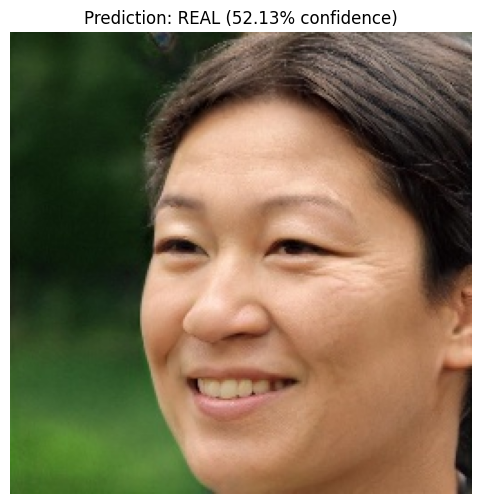


Options:
1. Test single image
2. Test all images in directory
3. Exit
Exiting...


In [6]:
# Main execution
if __name__ == "__main__":
    print("=== DEEPFAKE DETECTION TESTING ===")
    tester = DeepfakeTester()
    
    # Interactive testing menu
    while True:
        print("\nOptions:")
        print("1. Test single image")
        print("2. Test all images in directory")
        print("3. Exit")
        
        choice = input("Enter your choice (1-3): ")
        
        if choice == "1":
            img_path = input("Enter image path: ").strip()
            if os.path.exists(img_path):
                tester.predict_single_image(img_path)
            else:
                print("File not found!")
                
        elif choice == "2":
            print(f"\nTesting all images in {TestConfig.test_dir}...")
            results = tester.test_directory()
            if not results:
                print("No valid images found in test directory")
                
        elif choice == "3":
            print("Exiting...")
            break
            
        else:
            print("Invalid choice, please try again")